In [163]:
from dateutil.parser import parse 
import numpy as np # linear algebra
import pandas as pd # data processing

In [164]:
filename = 'household_power_consumption.txt'
df = pd.read_csv(filename, sep=";",parse_dates={'Date_time' : ['Date', 'Time']},
                 infer_datetime_format=True,low_memory=False, na_values=['nan','?'], index_col='Date_time')
df.shape

(2075259, 7)

The dataset contains 2,075,259 rows and 7 columns.
<p>NB: When importing Data Date and Time Fields were parsed into date_time column and made into index column</p>

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


All the columns are of numerical(float) datatype

In [166]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [49]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Fill the null entries with mean 

In [50]:
df = df.fillna(df.mean())

In [51]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

## Step 2: Data Visualization

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

Start by Resampling Data into 30Min, 1hr, Daily and Monthly Data and then plotting the same

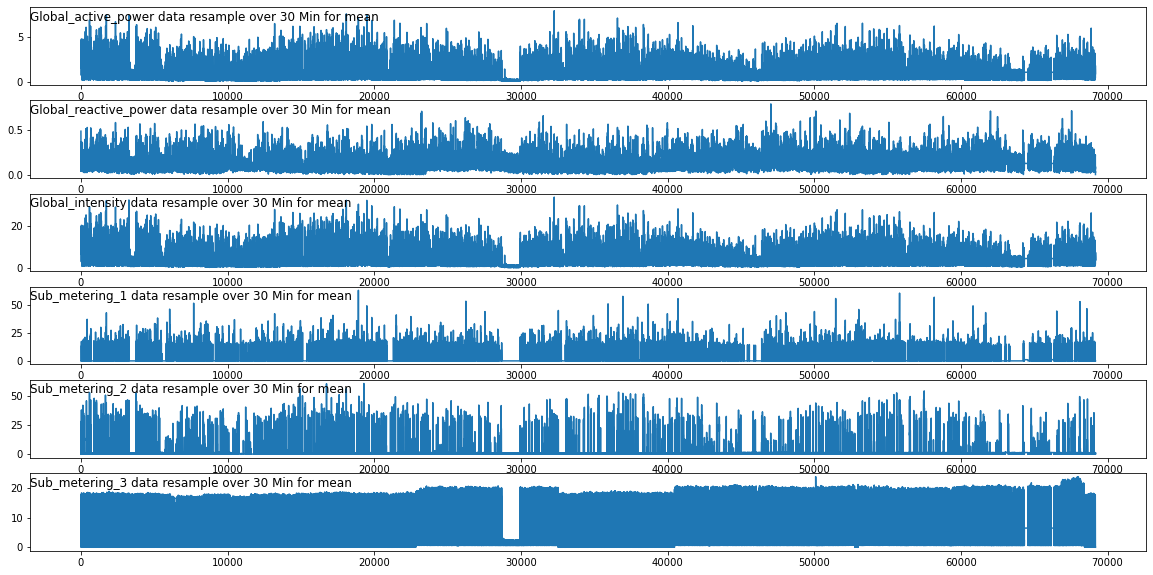

In [53]:
#30 Min
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('30min').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over 30 Min for mean', y=0.75, loc='left')
    i += 1
plt.show()

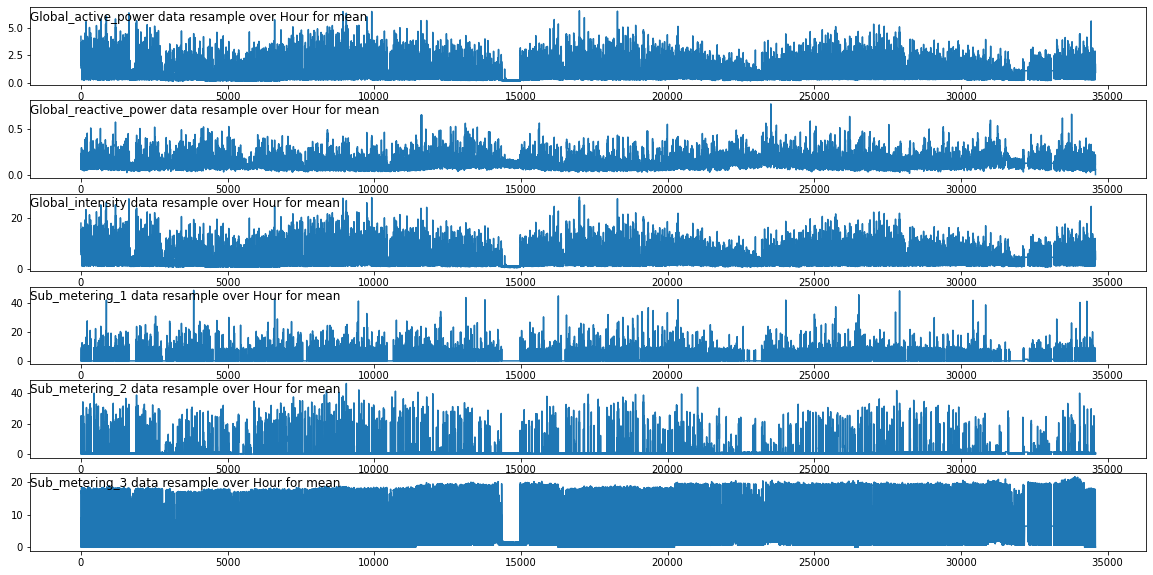

In [54]:
#Hour
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('H').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over Hour for mean', y=0.75, loc='left')
    i += 1
plt.show()

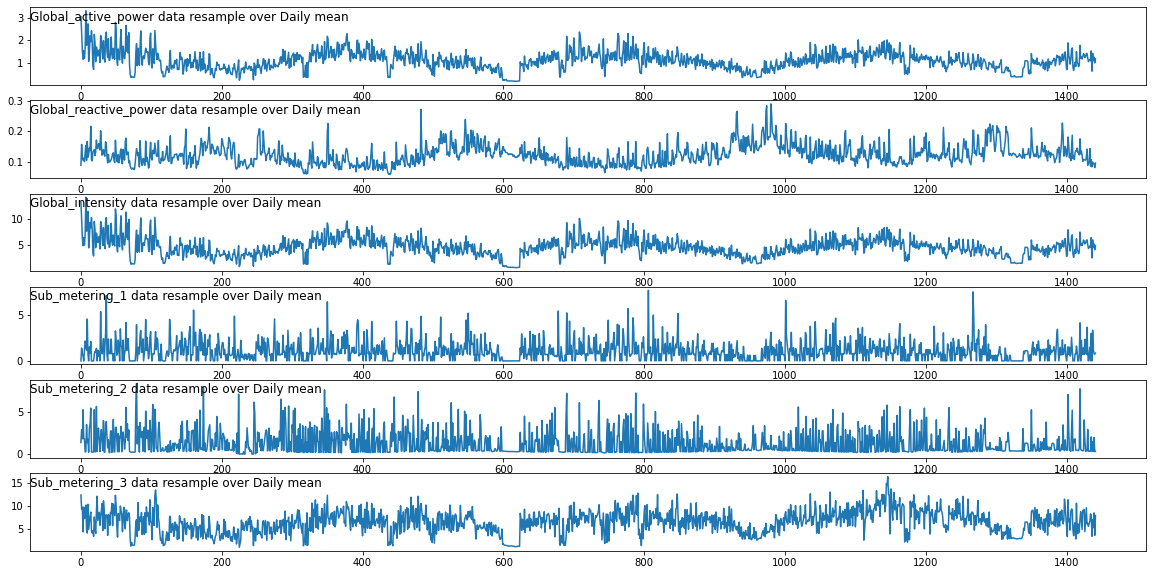

In [55]:
#Daily
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('D').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over Daily mean', y=0.75, loc='left')
    i += 1
plt.show()

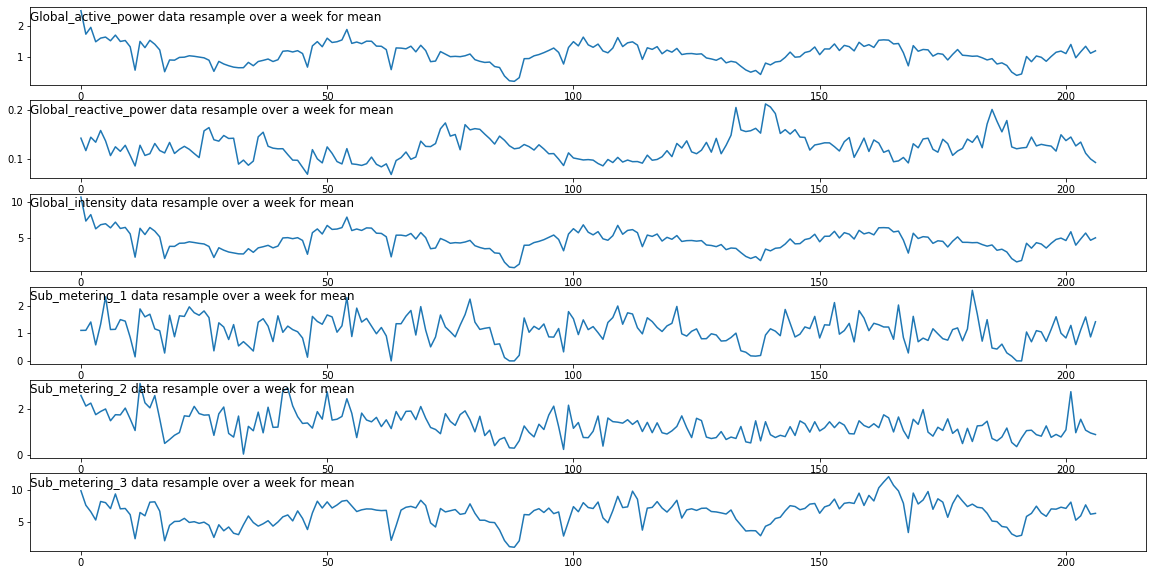

In [56]:
#Weekly
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('W').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over a week for mean', y=0.75, loc='left')
    i += 1
plt.show()

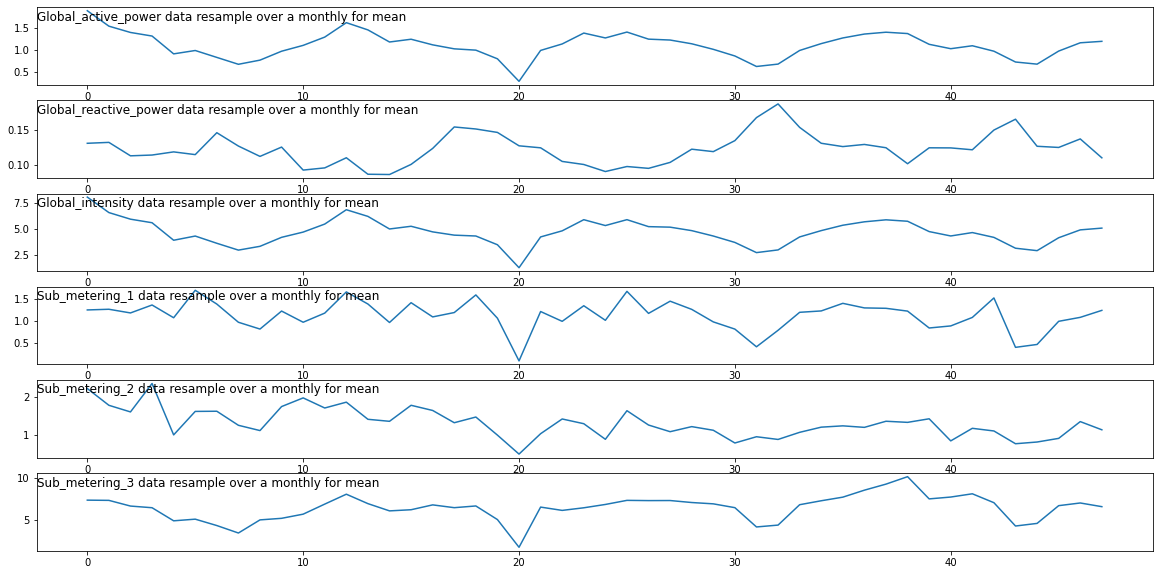

In [57]:
#Monthly
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('M').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over a monthly for mean', y=0.75, loc='left')
    i += 1
plt.show()

<p>Resampling by month, date or time is important because it has a great interaction as expected (changing the periodicity of the system).</p>
<p>Processing all the data will be costly, thus resampling will help decide which time frame to use</p>
<p>From the above graphs we settle with data resampled per hour</p>

#### Checking for Seasonality

In [58]:
#Create a copy of dataset
df_elec = df.copy()

In [40]:
df_elec.reset_index(inplace=True)

In [59]:
df_elec.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


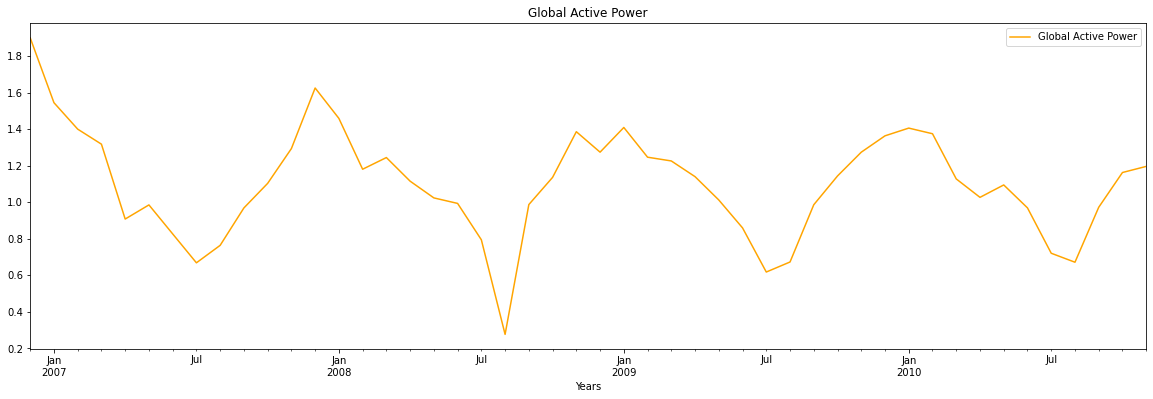

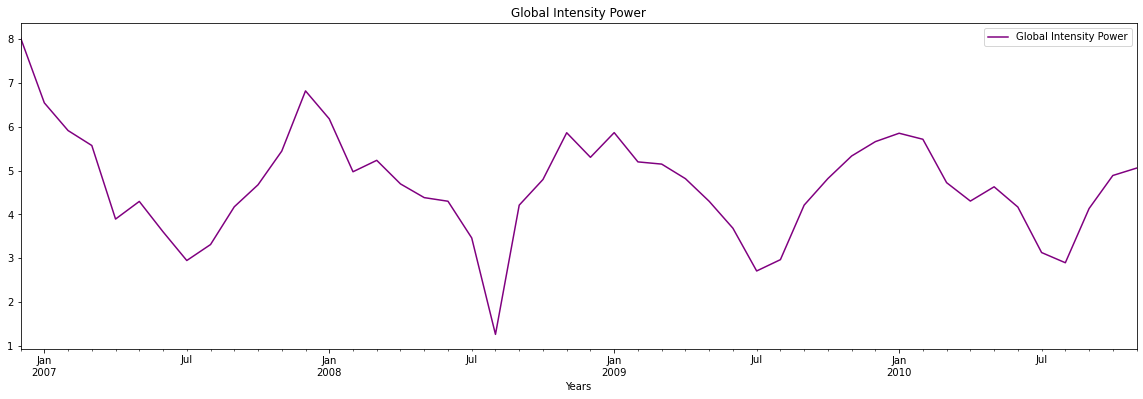

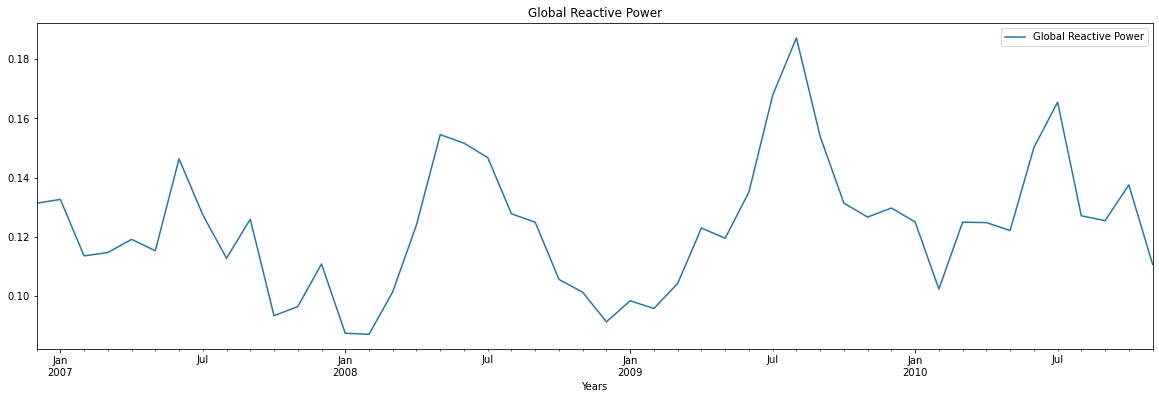

In [92]:
# to set the plot size
plt.figure(figsize=(20, 6))  
df['Global_active_power'].resample('M').mean().plot(label='Global Active Power', color='orange')
# adding title to the plot
plt.title('Global Active Power')
# adding Label to the x-axis
plt.xlabel('Years')  
# adding legend to the curve
plt.legend()

# to set the plot size
plt.figure(figsize=(20, 6))  
df['Global_intensity'].resample('M').mean().plot(label='Global Intensity Power', color='purple')# adding title to the plot
plt.title('Global Intensity Power')
# adding Label to the x-axis
plt.xlabel('Years')  
# adding legend to the curve
plt.legend()

# to set the plot size
plt.figure(figsize=(20, 6))  
df['Global_reactive_power'].resample('M').mean().plot(label='Global Reactive Power')
# adding title to the plot
plt.title('Global Reactive Power')
# adding Label to the x-axis
plt.xlabel('Years')  
# adding legend to the curve
plt.legend()

For 3 variables Global active and intensity power exhibit same trends i.e, exhibiting highs in the months of December and Jan and lows in the months of August, the trend for the two is also a decreasing trend. Global reactive power is quite the opposite of the two, i.e. Its lows is recorded in December-January period and highs in month of August. Its trend is also an increasing trend.

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

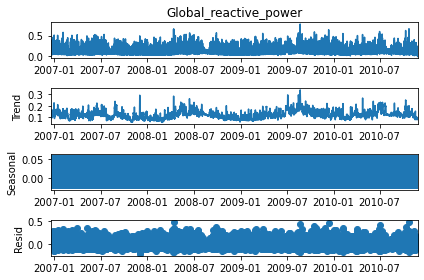

In [76]:
decompose_result = seasonal_decompose(df['Global_reactive_power'].resample('H').mean())

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

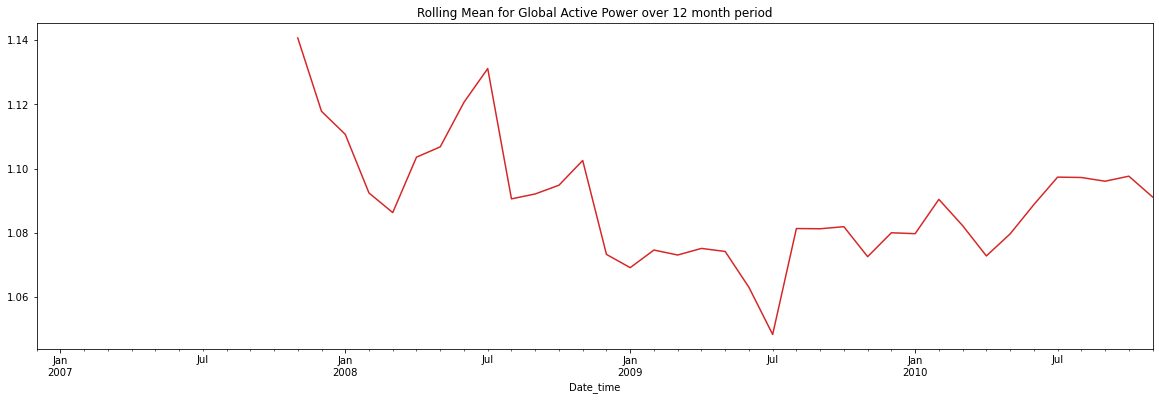

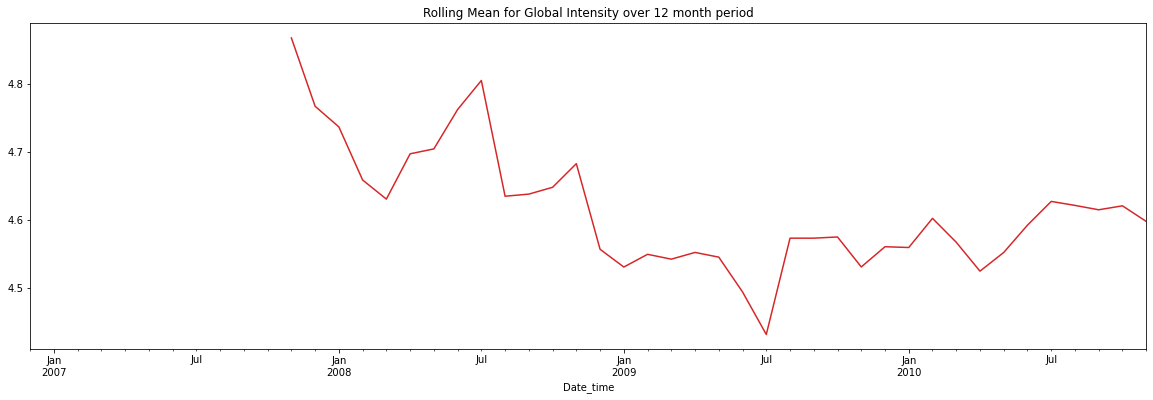

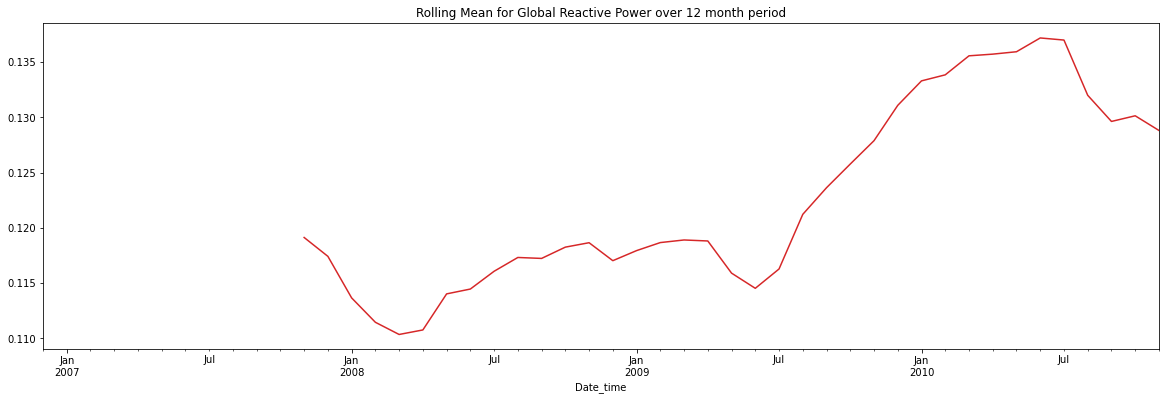

In [96]:
plt.figure(figsize=(20,6))
df['Global_active_power'].resample('M').mean().rolling(window = 12).mean().plot(color="tab:red", title="Rolling Mean for Global Active Power over 12 month period");
plt.figure(figsize=(20,6))
df['Global_intensity'].resample('M').mean().rolling(window = 12).mean().plot(color="tab:red", title="Rolling Mean for Global Intensity over 12 month period");
plt.figure(figsize=(20,6))
df['Global_reactive_power'].resample('M').mean().rolling(window = 12).mean().plot(color="tab:red", title="Rolling Mean for Global Reactive Power over 12 month period");

<Figure size 1440x432 with 0 Axes>

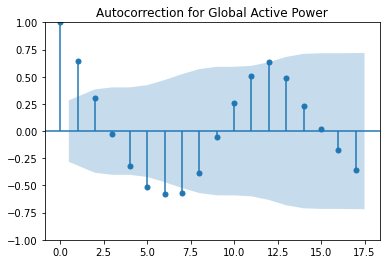

<Figure size 1440x432 with 0 Axes>

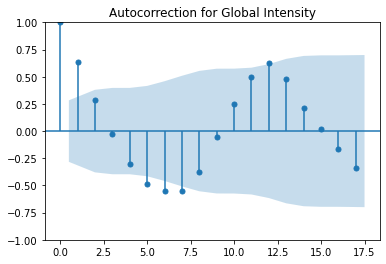

<Figure size 1440x432 with 0 Axes>

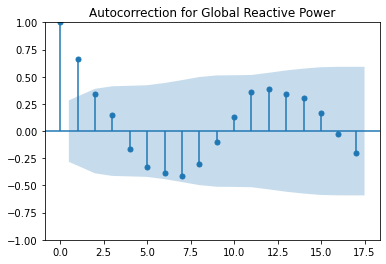

In [120]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(20, 6))  
plot_acf(df['Global_active_power'].resample('M').mean(), title="Autocorrection for Global Active Power");

plt.figure(figsize=(20, 6))  
plot_acf(df['Global_intensity'].resample('M').mean(), title="Autocorrection for Global Intensity");

plt.figure(figsize=(20, 6))  
plot_acf(df['Global_reactive_power'].resample('M').mean(), title="Autocorrection for Global Reactive Power");

<p>Notice from the above chart that after 2 lags, the lines get inside confidence interval (light blue area). This can be due to seasonality of 12-13 months in our data </p>

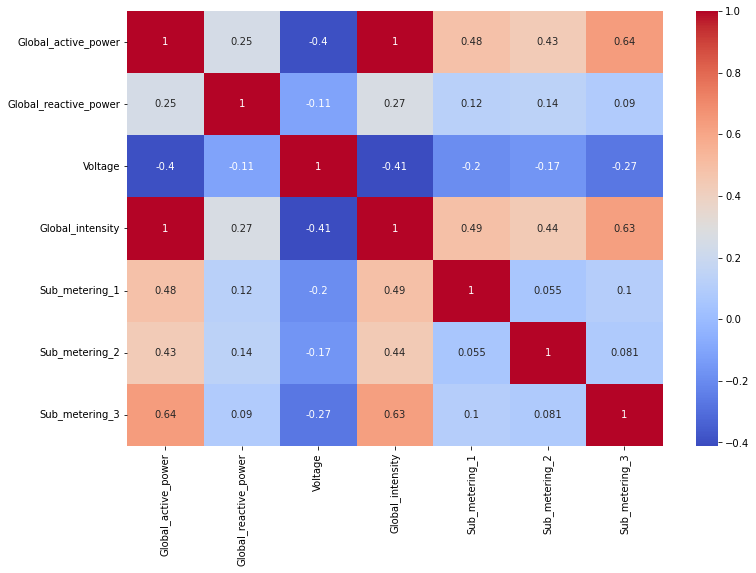

In [83]:
correlations = df.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

Voltage is highly correlated to with other features and it will be excluded while making the  model.

## Data Transformation

Data tranformation by removing Seasonality and Correlated Colum

In [107]:
#Make a copy of data
df_data = df.copy()
print("---------------------------------------------------")
print(df_data.shape)

print("---------------------------------------------------")

print(df_data.info())

---------------------------------------------------
(2075259, 7)
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB
None


In [110]:
df_resampled = df_data.resample("H").mean()

print("---------------------------------------------------")
print(df_resampled.shape)

print("---------------------------------------------------")

print(df_resampled.info())

---------------------------------------------------
(34589, 7)
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: H
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34589 non-null  float64
 1   Global_reactive_power  34589 non-null  float64
 2   Voltage                34589 non-null  float64
 3   Global_intensity       34589 non-null  float64
 4   Sub_metering_1         34589 non-null  float64
 5   Sub_metering_2         34589 non-null  float64
 6   Sub_metering_3         34589 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB
None


<b>New dataset has 34598 observations sampled on hourly basis</b>

In [122]:
df_selected = df_resampled.drop(['Voltage'],axis=1)

print("---------------------------------------------------")
print(df_selected.info())

---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: H
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34589 non-null  float64
 1   Global_reactive_power  34589 non-null  float64
 2   Global_intensity       34589 non-null  float64
 3   Sub_metering_1         34589 non-null  float64
 4   Sub_metering_2         34589 non-null  float64
 5   Sub_metering_3         34589 non-null  float64
dtypes: float64(6)
memory usage: 1.8 MB
None


### Remove Trend and Seasonality

<b>Dicky-Fuller Test for Stationarity</b>

In [124]:
#Global active Power
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df_selected['Global_active_power'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -14.369492090325048
2. P-Value :  9.547270212653613e-27
3. Num Of Lags :  51
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 34537
5. Critical Values :
	 1% :  -3.4305393559398922
	 5% :  -2.8616236906108443
	 10% :  -2.566814545887977


In [125]:
#Global intensity
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df_selected['Global_intensity'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -14.714212007378546
2. P-Value :  2.816570838745856e-27
3. Num Of Lags :  51
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 34537
5. Critical Values :
	 1% :  -3.4305393559398922
	 5% :  -2.8616236906108443
	 10% :  -2.566814545887977


Dicky-Fuller Test for Stationarity is for confirming that above are stationary or non-stationary.
<p>p-value > 0.05 - This implies that time-series is non-stationary in this case the series is non stationary<p/>

<b>Remove Trend Lines by Log Transformation</b>

In [154]:
#Create a copy of dataset
df_sel = df_selected.copy()

df_sel.head()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,13.046667,0.0,0.416667,17.216667


In [155]:
#Transform columns - power transformation
df_sel['Global_active_power'] = df_sel['Global_active_power'].apply(lambda x : x ** 0.5)
df_sel['Global_reactive_power'] = df_sel['Global_reactive_power'].apply(lambda x : x ** 0.5)
df_sel['Global_intensity'] = df_sel['Global_intensity'].apply(lambda x : x ** 0.5)
df_sel['Sub_metering_1'] = df_sel['Sub_metering_1'].apply(lambda x : x ** 0.5)
df_sel['Sub_metering_2'] = df_sel['Sub_metering_2'].apply(lambda x : x ** 0.5)
df_sel['Sub_metering_3'] = df_sel['Sub_metering_3'].apply(lambda x : x ** 0.5)

In [156]:
df_sel.head()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,
2006-12-16 17:00:00,2.054967,0.478539,4.254409,0.0,0.726483,4.106228
2006-12-16 18:00:00,1.905833,0.282902,3.949684,0.0,2.591653,4.106905
2006-12-16 19:00:00,1.843972,0.291947,3.808324,0.0,1.197219,4.084524
2006-12-16 20:00:00,1.807918,0.274044,3.730505,0.0,0.000000,4.096747
2006-12-16 21:00:00,1.748275,0.276887,3.612017,0.0,0.645497,4.149297


<b>Remove Seasonality </b>
<p>seasonality by differencing technique</p>

In [157]:
df_sel['Global_active_power'] = df_sel['Global_active_power'] - df_sel['Global_active_power'].shift()
df_sel['Global_reactive_power'] = df_sel['Global_reactive_power'] - df_sel['Global_reactive_power'].shift()
df_sel['Global_intensity'] = df_sel['Global_intensity'] - df_sel['Global_intensity'].shift()
df_sel['Sub_metering_1'] = df_sel['Sub_metering_1'] - df_sel['Sub_metering_1'].shift()
df_sel['Sub_metering_2'] = df_sel['Sub_metering_2'] - df_sel['Sub_metering_2'].shift()
df_sel['Sub_metering_3'] = df_sel['Sub_metering_3'] - df_sel['Sub_metering_1'].shift()

In [162]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df_sel['Global_active_power'].dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
# print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -43.09908358443081
2. P-Value :  0.0
3. Num Of Lags :  49
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 34538
5. Critical Values :
	 1% :  -3.4305393504569457
	 5% :  -2.8616236881875956
	 10% :  -2.5668145445981443


## Stacked LSTM Modelling

In [167]:
# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

Scalling and Spliting data to train and test Data